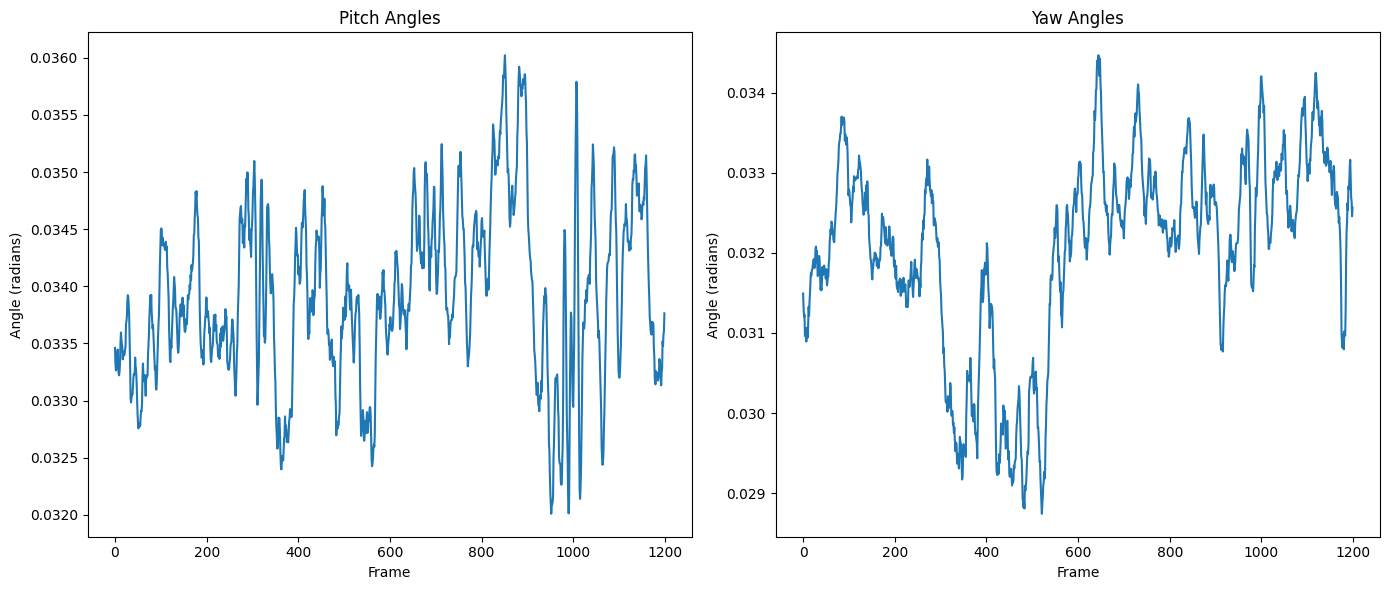

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load one of the labeled data files
data = np.loadtxt('labeled/0.txt')

# Plot pitch and yaw angles
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(data[:, 0])
plt.title('Pitch Angles')
plt.xlabel('Frame')
plt.ylabel('Angle (radians)')

plt.subplot(1, 2, 2)
plt.plot(data[:, 1])
plt.title('Yaw Angles')
plt.xlabel('Frame')
plt.ylabel('Angle (radians)')

plt.tight_layout()
plt.show()

In [2]:
# Check for NaN values in the dataset
nan_indices = np.isnan(data).any(axis=1)
print(f"Number of frames with NaN values: {np.sum(nan_indices)}")

Number of frames with NaN values: 0


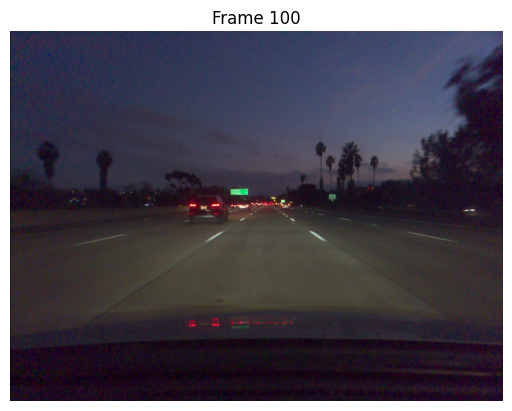

In [3]:
import cv2

# Function to read and display a video frame
def display_frame(video_path, frame_number):
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    if ret:
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f"Frame {frame_number}")
        plt.axis('off')
        plt.show()
    cap.release()

# Display a frame from the video
display_frame('labeled/0.hevc', 100)

In [4]:
!tree .

.
├── eval.py
├── labeled
│   ├── 0.hevc
│   ├── 0.txt
│   ├── 1.hevc
│   ├── 1.txt
│   ├── 2.hevc
│   ├── 2.txt
│   ├── 3.hevc
│   ├── 3.txt
│   ├── 4.hevc
│   └── 4.txt
├── nnotebook.ipynb
├── README.md
├── test_data.npy
├── train_data.npy
└── unlabeled
    ├── 5.hevc
    ├── 6.hevc
    ├── 7.hevc
    ├── 8.hevc
    └── 9.hevc

2 directories, 20 files


In [5]:
import numpy as np

# Paths to the labeled data
labeled_data_paths = [f'labeled/{i}.txt' for i in range(5)]

# Load the data into a list of numpy arrays
labeled_data = [np.loadtxt(path) for path in labeled_data_paths]

# Optionally, print the shape of each array to confirm loading
for i, data in enumerate(labeled_data):
    print(f"Data from file {i}: shape {data.shape}")

Data from file 0: shape (1200, 2)
Data from file 1: shape (1200, 2)
Data from file 2: shape (1200, 2)
Data from file 3: shape (1200, 2)
Data from file 4: shape (1196, 2)


In [6]:
# Splitting the data
train_data = labeled_data[:4]  # Use the first four for training
test_data = labeled_data[4:]   # Use the last one for testing

# Print shapes to verify
print(f"Training data: {[data.shape for data in train_data]}")
print(f"Testing data: {[data.shape for data in test_data]}")

Training data: [(1200, 2), (1200, 2), (1200, 2), (1200, 2)]
Testing data: [(1196, 2)]


In [7]:
# Example: Saving the training and testing data to disk
np.save('train_data.npy', np.array(train_data))
np.save('test_data.npy', np.array(test_data))

In [8]:
import cv2
import numpy as np

def extract_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return frames

# Example usage
video_frames = extract_frames('labeled/0.hevc')
print(f"Extracted {len(video_frames)} frames.")

KeyboardInterrupt: 

In [ ]:
# Load pitch and yaw angles
angles = np.loadtxt('labeled/0.txt')
print(f"Loaded pitch and yaw data with shape: {angles.shape}")

Loaded pitch and yaw data with shape: (1200, 2)


In [ ]:
# Check if the number of frames matches the number of angle pairs
assert len(video_frames) == len(angles), "Number of frames and angle pairs do not match!"

# Combine frames with angles
frame_angle_pairs = list(zip(video_frames, angles))

In [ ]:
def preprocess_frame(frame):
    # Resize frame to a fixed size and normalize pixel values
    frame = cv2.resize(frame, (224, 224))  # Example size
    frame = frame / 255.0  # Normalize to [0, 1]
    return frame

# Preprocess all frames
preprocessed_frames = [preprocess_frame(frame) for frame, angle in frame_angle_pairs]

In [ ]:
# Convert to NumPy arrays for training
X = np.array(preprocessed_frames)
y = np.array([angle for frame, angle in frame_angle_pairs])

ModuleNotFoundError: No module named 'sklearn.model_model'

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels respectively
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)